In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#### Loading the data ####

In [2]:
data = pd.read_csv('C:/Users/Sarthak/Documents/googleplaystore.csv')
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1594,Official Matsumoto Kiyoshi application,LIFESTYLE,3.2,3031,2.7M,"1,000,000+",Free,0,Everyone,Lifestyle,"July 3, 2018",1.5.3,4.0 and up
7896,CT Checkout,FINANCE,5.0,1,8.4M,50+,Free,0,Everyone,Finance,"April 20, 2017",1.2,4.2 and up
1226,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.5,61881,Varies with device,"5,000,000+",Free,0,Everyone,Food & Drink,"April 10, 2018",Varies with device,Varies with device
5829,AY Sing,BOOKS_AND_REFERENCE,4.8,111,10M,"5,000+",Free,0,Everyone,Books & Reference,"May 21, 2018",1.6.2,4.1 and up
5910,British Airways,TRAVEL_AND_LOCAL,4.2,25726,51M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 24, 2018",4.20,4.4 and up


### Assessing data ###

In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Data Preprocessing: ####

In [5]:
# Check if duplicates exist
data.duplicated().sum()

483

In [6]:
# droping duplicates
data.drop_duplicates(inplace=True)
# rechecking dataframe
sum(data.duplicated())

0

In [7]:
# checking for unique values
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
#Dropping Rows with Null values
print(data.isnull().sum())
data.dropna(inplace=True)

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


##### Handling datatypes: #####

Define: 

'Installs' column shows datatype string which needs to be converted to float after omitting the special characters.

Code:

In [9]:
newInstalls = []

for row in data.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

data.Installs = newInstalls
data.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [10]:
data['Category'] = data.Category.astype('category')

In [11]:
data['Type'] = data.Type.astype('category')

Re-checking datatypes:

In [12]:
data.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs           float64
Type              category
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

##### Droping all irrelavant columns#####

In [13]:
#Droping all irrelavant columns
data = data.drop(['Size','Reviews','Price', 'Content Rating','Last Updated','Current Ver','Android Ver'], axis = 1)
data.head()

,App,Category,Rating,Installs,Type,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000.0,Free,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,500000.0,Free,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000.0,Free,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000.0,Free,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000.0,Free,Art & Design;Creativity


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 6 columns):
App         8886 non-null object
Category    8886 non-null category
Rating      8886 non-null float64
Installs    8886 non-null float64
Type        8886 non-null category
Genres      8886 non-null object
dtypes: category(2), float64(2), object(2)
memory usage: 366.1+ KB


In [15]:
# View descriptive statistics of the dataframe
data.describe()

,Rating,Installs
count,8886.000000,8.886000e+03
mean,4.187959,1.650061e+07
std,0.522428,8.640413e+07
min,1.000000,1.000000e+00
25%,4.000000,1.000000e+04
50%,4.300000,5.000000e+05
75%,4.500000,5.000000e+06
max,5.000000,1.000000e+09


#### Analysing the data ####

 #### Q: Do Free apps get installed more than Paid apps?

In [16]:
avg_free_installs = data[data['Type']=='Free'].mean()['Installs']
avg_paid_installs = data[data['Type']=='Paid'].mean()['Installs']
avg_free_installs, avg_paid_installs

(17710601.07021148, 113193.91489361702)

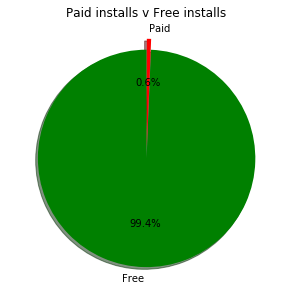

In [17]:
plt.figure(figsize = [10, 5])
plt.title('Paid installs v Free installs')
plt.pie([avg_free_installs, avg_paid_installs], explode=(0, 0.1), labels=['Free','Paid'], colors = ['Green','Red'],
        autopct='%1.1f%%', shadow=True, startangle=90);

The average installation of free apps are way higher than the average installation of paid apps.

#### Q: Which are the most popular categories among developers?

In [20]:
data.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Therefore Family and Game are the two most popular categories among developers.

#### Q: Which are the most popular categories among users?

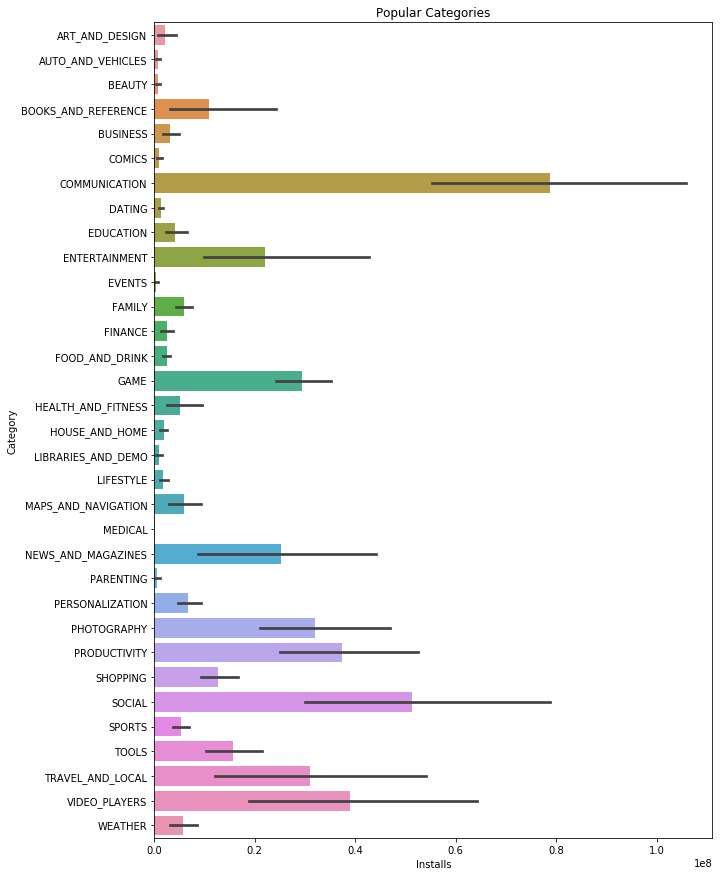

In [18]:
plt.figure(figsize = [10, 15])
plt.title('Popular Categories')
sb.barplot(data= data, y = 'Category', x = 'Installs');

Therefore the above visuals clarifies the most popular category is COMMUNICATION while the MEDICAL category has the least popularity.

#### Q: Does app rating influence app installation?

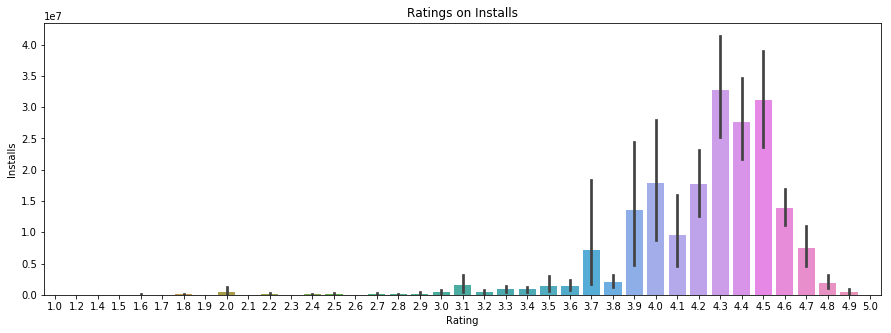

In [19]:
plt.figure(figsize = [15, 5])
plt.title('Ratings on Installs')
sb.barplot(data= data, y = 'Installs', x = 'Rating');

Hence, we can clearly state that the apps with rating within 3.9 to 4.6 have the most installations. It is note worthy that highest rated apps have not been installed most. This is probably due to human bias that most people dont give full ratings to apps even when they like it.